In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

## Data Pre-processing

In [104]:
url = "http://bit.ly/w-data"
s_data =pd.read_csv(url)
print("Data imported successfully")
s_data.head(25)

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [3]:
X=s_data.iloc[:,:-1].values
y=s_data.iloc[:,1].values

## Ploting the data

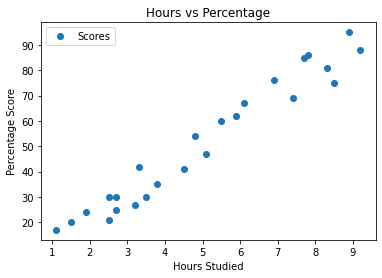

In [238]:
s_data.plot(x='Hours',y='Scores',style='o')
plt.title('Hours vs Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.show()

In [239]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=0)

In [240]:
def propagate(theta, X, Y):
    m=len(Y)
    A=np.dot(theta,X.T)
    cost=(1/2*m)*np.sum((A-Y)**2)
    #Find the gradient descent
    d_theta=(1/m)*np.dot(A-Y,X)
    return d_theta, cost


In [241]:
def optimize(theta, X, Y, num_iterations, learning_rate, print_cost=False):
    costs = []
    
    for i in range(num_iterations):
        d_theta,cost=propagate(theta, X, Y)
        theta=theta-(learning_rate*d_theta)
        costs.append(cost)
    
    return theta, d_theta, costs

In [242]:
def predict(theta, X):
    #w = w.reshape(X.shape[0], 1)
    A=np.dot(theta,X.T)
    return A

In [243]:
def model(X_train, Y_train, X_test, Y_test, num_iterations, learning_rate, print_cost=False):
    theta=np.zeros((2,1))
    theta,d_theta,cost = optimize(theta, X_train, y_train, num_iterations, learning_rate, print_cost=False)
    
    Y_prediction_test=predict(theta,X_test)
    Y_prediction_train=predict(theta, X_train)
    
    return theta

## Prediction with the training dataset

In [244]:
theta=model(X_train,y_train,X_test,y_test,1000,0.0001,True)
print(theta)

[[9.85670543]
 [9.85670543]]


## Ploting the graph with Line of Best Fit for training data

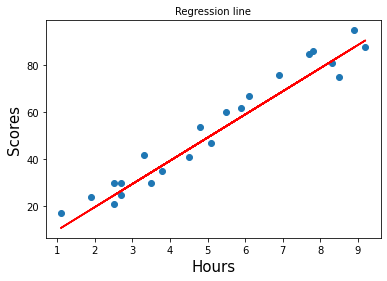

In [245]:
line = np.dot(X_train,theta.T)
plt.scatter(X_train,y_train)
plt.plot(X_train,line,color='red')
plt.xlabel("Hours",fontsize=15)
plt.ylabel("Scores",fontsize=15)
plt.title("Regression line",fontsize=10)
plt.show()


## Prediction with the test dataset

In [246]:
Y_predicted=predict(theta,X_test)
print(Y_predicted)

[[14.78505814 31.54145736 72.93962015]
 [14.78505814 31.54145736 72.93962015]]


## Ploting the graph with Line of Best Fit for test data

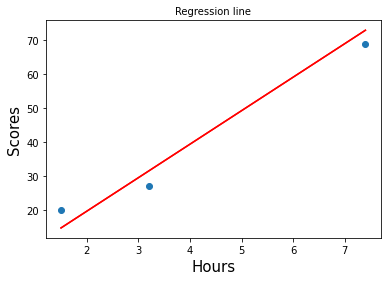

In [247]:
line = np.dot(X_test,theta.T)
plt.scatter(X_test,y_test)
plt.plot(X_test,line,color='red')
plt.xlabel("Hours",fontsize=15)
plt.ylabel("Scores",fontsize=15)
plt.title("Regression line",fontsize=10)
plt.show()